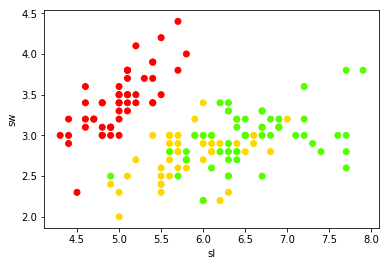

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from itertools import product


df_iris = pd.read_csv(u'iris.txt', sep=' ')

keys = ['sl', 'sw', 'pl', 'pw', 'c']

plt.scatter(df_iris['sl'], df_iris['sw'], c=df_iris['c'], cmap='prism')
plt.xlabel('sl')
plt.ylabel('sw')
plt.show()

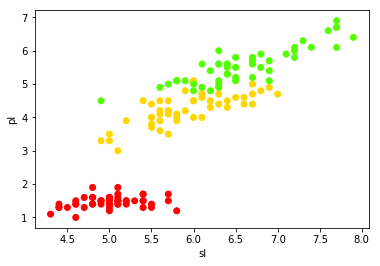

In [2]:
plt.scatter(df_iris['sl'], df_iris['pl'], c=df_iris['c'], cmap='prism')
plt.xlabel('sl')
plt.ylabel('pl')
plt.show()

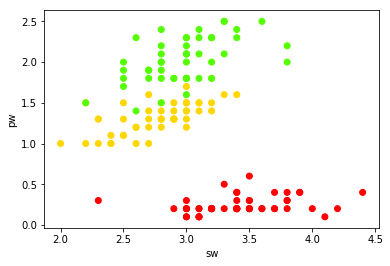

In [3]:
plt.scatter(df_iris['sw'], df_iris['pw'], c=df_iris['c'], cmap='prism')
plt.xlabel('sw')
plt.ylabel('pw')
plt.show()

In [4]:
df_iris.corr()

,sl,sw,pl,pw,c
sl,1.000000,-0.109369,0.871754,0.817954,0.782561
sw,-0.109369,1.000000,-0.420516,-0.356544,-0.419446
pl,0.871754,-0.420516,1.000000,0.962757,0.949043
pw,0.817954,-0.356544,0.962757,1.000000,0.956464
c,0.782561,-0.419446,0.949043,0.956464,1.000000


In [5]:
abs_corelation = df_iris.corr().abs()
abs_corelation_unstacked = abs_corelation.unstack()
abs_corelation_unstacked_sorted = abs_corelation_unstacked.sort_values()
abs_corelation_unstacked_sorted

sl  sw    0.109369
sw  sl    0.109369
pw  sw    0.356544
sw  pw    0.356544
c   sw    0.419446
sw  c     0.419446
    pl    0.420516
pl  sw    0.420516
c   sl    0.782561
sl  c     0.782561
    pw    0.817954
pw  sl    0.817954
pl  sl    0.871754
sl  pl    0.871754
pl  c     0.949043
c   pl    0.949043
pw  c     0.956464
c   pw    0.956464
pl  pw    0.962757
pw  pl    0.962757
sl  sl    1.000000
pl  pl    1.000000
sw  sw    1.000000
pw  pw    1.000000
c   c     1.000000
dtype: float64

## Seems like highest corelation is between pw - pl

* Creating pw - pl scatter graph

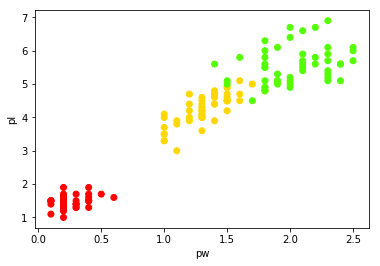

In [6]:
plt.scatter(df_iris['pw'], df_iris['pl'], c=df_iris['c'], cmap='prism')
plt.xlabel('pw')
plt.ylabel('pl')
plt.show()

## If corelation between c and something is high, we can assume that this feature is affecting its class more than others.

* Highest corelation with c is pw value.

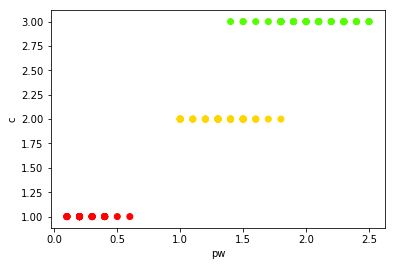

In [7]:
plt.scatter(df_iris['pw'], df_iris['c'], c=df_iris['c'], cmap='prism')
plt.xlabel('pw')
plt.ylabel('c')
plt.show()

In [10]:
import queue as Queue
def find_distance_between_points(p1, p2):
    # Euclidian
    xd = p1[0] - p2[0]
    yd = p1[1] - p2[1]
    x_pow = xd ** 2
    y_pow = yd ** 2
    return (x_pow + y_pow) ** 0.5


def find_closest_k_points(point, points, k):
    dict = {}
    pq = Queue.PriorityQueue()
    magicNumber = 0.0000000000001
    for p in range(len(points)):
        distance = find_distance_between_points(x[p], point)
        while (distance in dict):
            distance = distance + magicNumber
        dict[distance] = x[p]
        pq.put(distance)

    retval = []
    i = 0
    while (i < k):
        closest_distance = pq.get()
        closest_cell = dict.get(closest_distance)
        retval.append(closest_cell)
        i += 1

    return retval


def predict_element_class(point, points, k):
    closest_points = find_closest_k_points(point, points, k)
    dict = {}
    for i in range(len(closest_points)):
        if (closest_points[i][2] in dict):
            val = dict.get(closest_points[i][2])
            dict[closest_points[i][2]] = val + 1
        else:
            dict[closest_points[i][2]] = 1

    pq = Queue.PriorityQueue()
    if (1.0 in dict):
        pq.put(dict.get(1.0))
    if (2.0 in dict):
        pq.put(dict.get(2.0))
    if (3.0 in dict):
        pq.put(dict.get(3.0))

    while not pq.empty():
        predictedClass = pq.get()

    if (predictedClass == dict.get(1.0)):
        return 1.0
    elif (predictedClass == dict.get(2.0)):
        return 2.0
    else:
        return 3.0


def find_prediction_accuracy(points, k):
    fails = 0
    for p in range(len(points)):
        tmp = np.delete(points, p, 0)
        predicted_class = predict_element_class(points[p], tmp, k)
        expected_class = points[p][2]
        if (predicted_class != expected_class):
            fails = fails + 1
    return ((len(points) - fails) * 100) / len(points)


x = df_iris[['pw', 'pl', 'c']].as_matrix()

start = 1
end = 20
bestAcc = {}
bestAcc[1] = 0
accuracyMap = {}
while (start < end):
    accuracy = find_prediction_accuracy(x, start)
    accuracyMap[start] = accuracy
    start = start + 1



print(accuracyMap)

{1: 98.66666666666667, 2: 97.33333333333333, 3: 98.0, 4: 97.33333333333333, 5: 96.66666666666667, 6: 96.66666666666667, 7: 96.66666666666667, 8: 97.33333333333333, 9: 96.66666666666667, 10: 96.66666666666667, 11: 96.0, 12: 96.0, 13: 96.0, 14: 96.0, 15: 96.0, 16: 96.0, 17: 96.0, 18: 96.0, 19: 96.0}
